# Aufgabe zu Daten Blattfeder:

**Macht Sinn:**
- ANOVA
- Lineare Regression
- QQ-Plot, usw.
- Welche Annhamen man für ANOVA machen muss.
- Auflösung
- Fraktion
- Freiheitsgrade

**Macht keinen Sinn:**
- x-R-s-Karte
- Cp, Cpk
- p-Karte

In [1]:
import numpy as np
import pandas as pd
from src.n_way_anova import Anova, plot_linear_effects
from src.alias import get_interaction_table,get_aliases

In [2]:
df = pd.read_csv("./Daten/Blattfeder.csv")
df

,A,B,C,D,E,h
0,-1,-1,-1,-1,-1,7.78
1,-1,-1,-1,-1,-1,7.81
2,-1,-1,-1,-1,-1,7.78
3,1,-1,-1,1,-1,8.15
4,1,-1,-1,1,-1,7.88
5,1,-1,-1,1,-1,8.18
6,-1,1,-1,1,-1,7.50
7,-1,1,-1,1,-1,7.56
8,-1,1,-1,1,-1,7.50
9,1,1,-1,-1,-1,7.59


### Fraktion:

- Es ist ein Halbfaktorielle $2^5$-Plan als ein $2^{5-1}$-Plane. Bei dem 3 mal gemessen wurde.

### Aliasing/ Auflösung/definierende Gleichung

In [3]:
for a in get_aliases(df[["A", "B", "C", "D","E"]].values):
    print(a)

A + BCD
B + ACD
C + ABD
D + ABC
E + ABCDE
AB + CD
AC + BD
AD + BC
AE + BCDE
BE + ACDE
CE + ABDE
DE + ABCE
ABE + CDE
ACE + BDE
ADE + BCE


- Die **Auflösung** entspricht dem kürzesten Wort. Wäre hier $IV$.
- Der Plan hat ein **definierende Gleichung** von I = ABCD. => Es ist kein idealer $2^{5-1}$-Plan


###  Freiheitsgrade:

**Halbfaktoriell:**
- Es werden  16 Koeffizienten bestimmt mit 48 Versuchen und es bleiben 32 Freiheitsgrade.

**Vollfaktoriell:**
- Es werden  32 Koeffizienten bestimmt mit 48 Versuchen und es bleiben 16 Freiheitsgrade.

## Vollfaktorieller Plan:

### Lineare Effekte:

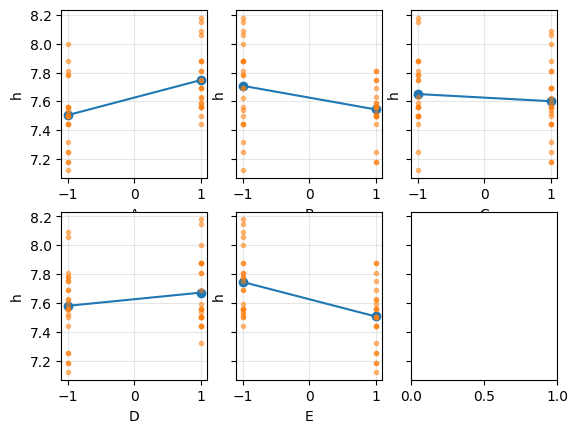

In [4]:
# Lineare Effekt der Haupteffekte
plot_linear_effects(df, ["A", "B", "C", "D", "E"], "h")

### Signifikante Effekte:

Shapiro p-value: 0.14741511980592314
The residuals seem normal distributed.


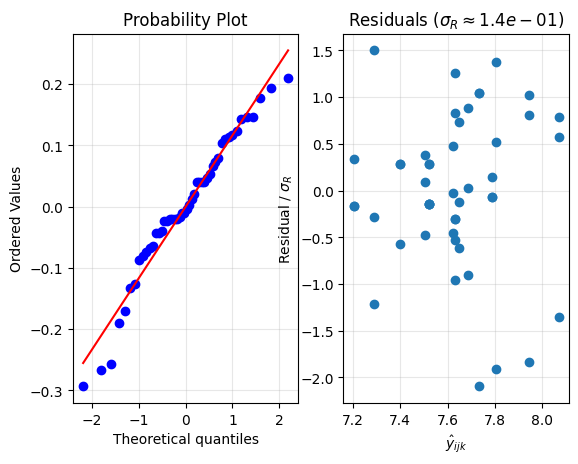

,df,sum_sq,mean_sq,F,PR(>F)
A,1.0,0.703252,0.703252,35.887838,0.000001
B,1.0,0.321769,0.321769,16.420264,0.000302
E,1.0,0.308367,0.308367,15.736339,0.000384
C:D,1.0,0.297846,0.297846,15.199456,0.000465
A:B:C:D,1.0,0.165306,0.165306,8.435751,0.006619
A:B:C:E,1.0,0.146027,0.146027,7.451952,0.010214
B:E,1.0,0.128094,0.128094,6.536776,0.015513
A:B:C,1.0,0.099919,0.099919,5.098979,0.030893
A:D,1.0,0.069286,0.069286,3.535740,0.069188
C:D:E,1.0,0.059900,0.059900,3.056773,0.089990


In [5]:
anova = Anova(df, "h ~ A * B * C * D * E")
anova.check()
anova.result

Der p-Wert wurde als 0.05 gewählt.

A, B, E, C:D, B:E, A:B:C, A:B:C:D, A:B:C:E sind signifikant.

### Regressionsmodell

Shapiro p-value: 0.08348285075900719
The residuals seem normal distributed.


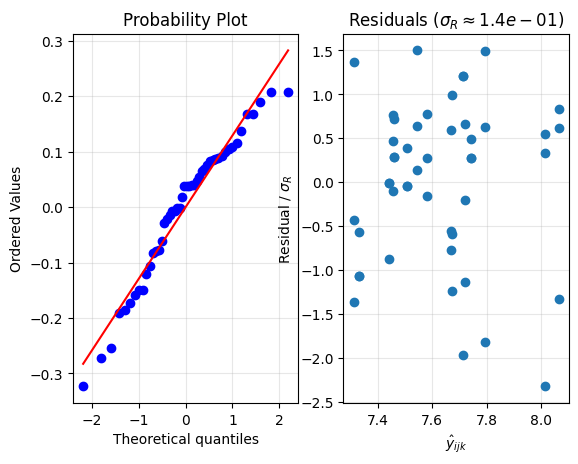

In [6]:
# Anova der Signifikanten Effekte:
anova = Anova(df, "h ~ A + B + E + C:D + B:E + A:B:C + A:B:C:D + A:B:C:E")
anova.check()
# anova.result

In [7]:
anova.summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      h   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     15.69
Date:                Tue, 21 Jan 2025   Prob (F-statistic):           1.08e-09
Time:                        16:44:40   Log-Likelihood:                 31.013
No. Observations:                  48   AIC:                            -46.03
Df Residuals:                      40   BIC:                            -31.06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8128      0.010    380.313      0.000       3.793       3.833
A              0.1210      0.020      6.037      0.000       0.081       0.162
B             -0.0819      0.020     -4.083      0.000      -0.122      -0.041
E             -0.1194      0.020     -5.954      0.000      -0.160      -0.079
C:D           -0.0148      0.020     -0.738      0.465      -0.055       0.026
B:E            0.0765      0.020      3.813      0.000       0.036       0.117
A:B:C          0.0456      0.020      2.275      0.028       0.005       0.086
A:B:C:D        3.8128      0.010    380.313      0.000       3.793       3.833
A:B:C:E        0.0198      0.020      0.987      0.330      -0.021       0.060
==============================================================================
Omnibus:                        3.146   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.207   Jarque-Bera (JB):                2.926
Skew:                          -0.590   Prob(JB):                        0.232
Kurtosis:                       2.732   Cond. No.                     1.05e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.74e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Regressionsmodel für die signifikanten Effekte.
**$$h = 3.8 + 0.12 A + -0.08 B - 0.12 E - 0.015 C:D + 0.077 B:E + 0.05 A:B:C + 3.8 A:B:C:D + 0.02 A:B:C:E$$**

### Stätzung für die Prozessstreuung:

Shapiro p-value: 0.08348285075900719
The residuals seem normal distributed.


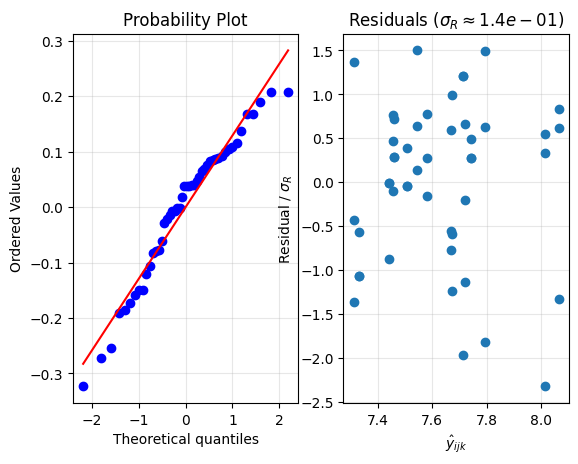

,df,sum_sq,mean_sq,F,PR(>F)
A,1.0,0.703252,0.703252,36.441865,4.196779e-07
E,1.0,0.684019,0.684019,35.445212,5.492812e-07
B,1.0,0.321769,0.321769,16.673756,2.066965e-04
B:E,1.0,0.280602,0.280602,14.540538,4.646254e-04
A:B:C,1.0,0.099919,0.099919,5.177696,2.830978e-02
A:B:C:E,1.0,0.016610,0.016610,0.860719,3.591022e-01
C:D,1.0,0.010502,0.010502,0.544208,4.649998e-01
A:B:C:D,1.0,0.003955,0.003955,0.204962,6.531914e-01
Residual,40.0,0.771917,0.019298,NaN,NaN


In [8]:
# Anova für das Regressionsmodel (hier Signifikante Effekte)
anova = Anova(df, "h ~ A + B + E + C:D + B:E + A:B:C + A:B:C:D + A:B:C:E")
anova.check()
anova.result

mean_sq auslesen und davon die Wurzel ziehen.

In [9]:
print(f"Schätzer für Streuung = {np.sqrt(0.019298)}")

Schätzer für Streuung = 0.13891724155050011


## Braucht es Wahrscheinlich nicht.

### Optimaler Plan:

Shapiro p-value: 0.08348285075900719
The residuals seem normal distributed.


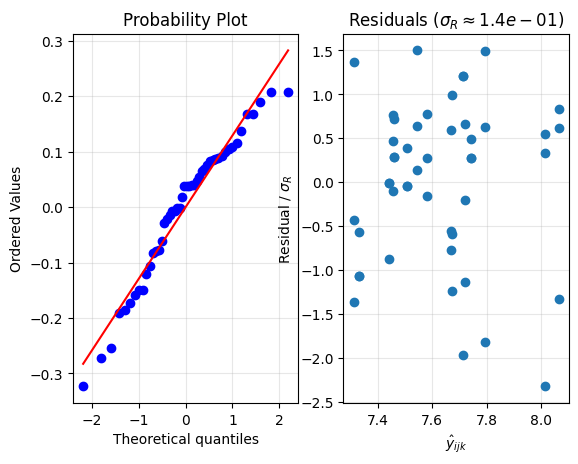

,df,sum_sq,mean_sq,F,PR(>F)
A,1.0,0.703252,0.703252,36.441865,4.196779e-07
E,1.0,0.684019,0.684019,35.445212,5.492812e-07
B,1.0,0.321769,0.321769,16.673756,2.066965e-04
B:E,1.0,0.280602,0.280602,14.540538,4.646254e-04
A:B:C,1.0,0.099919,0.099919,5.177696,2.830978e-02
A:B:C:E,1.0,0.016610,0.016610,0.860719,3.591022e-01
C:D,1.0,0.010502,0.010502,0.544208,4.649998e-01
A:B:C:D,1.0,0.003955,0.003955,0.204962,6.531914e-01
Residual,40.0,0.771917,0.019298,NaN,NaN


In [10]:
# Anova für das Regressionsmodel (hier Signifikante Effekte)
anova = Anova(df, "h ~ A + B + E + C:D + B:E + A:B:C + A:B:C:D + A:B:C:E")
anova.check()
anova.result

In [11]:
df["predict"] = anova.model.predict(df)
df.sort_values(by="predict").head(1)

,A,B,C,D,E,h,predict
26,-1,-1,-1,-1,1,7.12,7.310417


### Beiflussung der Streuung:

In [12]:
varianzen = []
for i in range(0, len(df) - 2, 3):  # Iteriere in Schritten von 3
        block = df["h"].iloc[i:i+3]  # Wähle einen Block von 3 Werten
        varianz = block.var()  # Berechne die Varianz des Blocks
        varianzen.append(varianz)

In [13]:
# Duplikate entfernen
dfvar = df.drop_duplicates(subset=['A', 'B', 'C',"D","E"])
dfvar.drop(columns=["h","predict"])

,A,B,C,D,E
0,-1,-1,-1,-1,-1
3,1,-1,-1,1,-1
6,-1,1,-1,1,-1
9,1,1,-1,-1,-1
12,-1,-1,1,1,-1
15,1,-1,1,-1,-1
18,-1,1,1,-1,-1
21,1,1,1,1,-1
24,-1,-1,-1,-1,1
27,1,-1,-1,1,1


In [14]:
dfvar["var"] = varianzen
dfvar

C:\Users\mauro\AppData\Local\Temp\ipykernel_20184\3597222333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfvar["var"] = varianzen


,A,B,C,D,E,h,predict,var
0,-1,-1,-1,-1,-1,7.78,7.741667,0.000300
3,1,-1,-1,1,-1,8.15,8.065000,0.027300
6,-1,1,-1,1,-1,7.50,7.506250,0.001200
9,1,1,-1,-1,-1,7.59,7.667083,0.010433
12,-1,-1,1,1,-1,7.54,7.793333,0.056933
15,1,-1,1,-1,-1,7.69,8.013333,0.049633
18,-1,1,1,-1,-1,7.44,7.454583,0.003733
21,1,1,1,1,-1,7.56,7.718750,0.015633
24,-1,-1,-1,-1,1,7.50,7.310417,0.037300
27,1,-1,-1,1,1,7.44,7.712917,0.064533


c:\Users\mauro\OneDrive - OST\Unterricht\HS2024\DOE\Prüfung\venvTest\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


Shapiro p-value: 0.0003764501126122018
The residuals are probably not normal distributed!


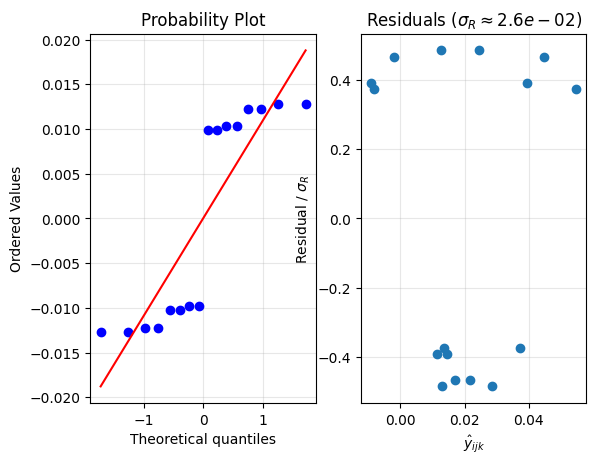

,df,sum_sq,mean_sq,F,PR(>F)
B,1.0,0.001948,0.001948,2.829787,0.191121
B:C,1.0,0.001344,0.001344,1.952118,0.256766
C:D,1.0,0.000895,0.000895,1.300534,0.336915
D:E,1.0,0.000777,0.000777,1.129078,0.365926
A:E,1.0,0.000732,0.000732,1.063555,0.378266
A,1.0,0.000617,0.000617,0.895964,0.413698
D,1.0,0.000405,0.000405,0.588914,0.498707
A:C,1.0,0.000119,0.000119,0.173141,0.705310
A:D,1.0,0.000091,0.000091,0.132503,0.739993
B:D,1.0,0.000041,0.000041,0.059312,0.823291


In [15]:
anova = Anova(dfvar, "var ~ A+B+C+D+E+A:B+A:C+A:D+B:C+B:D+C:D+A:E+B:E+C:E+D:E")
anova.check()
anova.result

## D-optimaler Plan
Ein D-optimaler Plan ist ein Versuchsplan, der die Informationsmatrix optimiert, um die Unsicherheit der geschätzten Modellparameter zu minimieren. Er reduziert die Anzahl der benötigten Versuche und maximiert die Effizienz der Parameter-Schätzung.

Bewertungskriterien:

- Determinante der Informationsmatrix: Größere Determinante bedeutet präzisere Parameter-Schätzungen.
- D-Effizienz: Effizienz des Plans relativ zu einem idealen Plan, Zielwert nahe 100 %.
- Konditionszahl: Niedrige Werte weisen auf numerische Stabilität hin.
- Abdeckung des Designraums: Relevante Bereiche müssen gut abgedeckt sein.
- Anzahl der Versuche: Mindestens so viele wie Modellparameter, möglichst minimal.
- Kurz: Ein D-optimaler Plan ist effizient, flexibel und minimiert experimentellen Aufwand bei maximaler Aussagekraft.